In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
%matplotlib inline

In [2]:
df = pd.read_csv('../data/ESSdata_Thinkful.csv')

In [3]:
df.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8.594000e+03,8594.000000,8586.000000,8580.000000,8555.000000,8569.000000,8563.000000,8579.000000,8500.000000,8584.000000,8355.000000,8577.000000
mean,3.954938e+04,6.500000,3.861985,5.559907,6.005143,5.319874,7.694616,5.192563,2.748941,1.497204,47.470736,1.384867
std,6.267259e+05,0.500029,2.019689,2.233700,2.129866,2.173449,1.735904,1.457643,0.905477,0.500021,18.397369,0.486592
min,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.052000e+03,6.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.714000e+03,6.500000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.745000e+03,7.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,62.000000,2.000000
max,1.100143e+07,7.000000,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


In [4]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [5]:
df.cntry.unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [6]:
ch = df[df.cntry=='CH']
cz = df[df.cntry=='CZ']
de = df[df.cntry=='DE']
es = df[df.cntry=='ES']
no = df[df.cntry=='NO']
se = df[df.cntry=='SE']

In [9]:
ch_happy = ch[ch.year==6]['happy'].reset_index(drop=True) - ch[ch.year==7]['happy'].reset_index(drop=True)
cz_happy = cz[cz.year==6]['happy'].reset_index(drop=True) - cz[cz.year==7]['happy'].reset_index(drop=True)
de_happy = de[de.year==6]['happy'].reset_index(drop=True) - de[de.year==7]['happy'].reset_index(drop=True)
es_happy = es[es.year==6]['happy'].reset_index(drop=True) - es[es.year==7]['happy'].reset_index(drop=True)
no_happy = no[no.year==6]['happy'].reset_index(drop=True) - no[no.year==7]['happy'].reset_index(drop=True)
se_happy = se[se.year==6]['happy'].reset_index(drop=True) - se[se.year==7]['happy'].reset_index(drop=True)

In [14]:
ch_ppltrst = ch[ch.year==6]['ppltrst'].reset_index(drop=True) - ch[ch.year==7]['ppltrst'].reset_index(drop=True)
cz_ppltrst = cz[cz.year==6]['ppltrst'].reset_index(drop=True) - cz[cz.year==7]['ppltrst'].reset_index(drop=True)
de_ppltrst = de[de.year==6]['ppltrst'].reset_index(drop=True) - de[de.year==7]['ppltrst'].reset_index(drop=True)
es_ppltrst = es[es.year==6]['ppltrst'].reset_index(drop=True) - es[es.year==7]['ppltrst'].reset_index(drop=True)
no_ppltrst = no[no.year==6]['ppltrst'].reset_index(drop=True) - no[no.year==7]['ppltrst'].reset_index(drop=True)
se_ppltrst = se[se.year==6]['ppltrst'].reset_index(drop=True) - se[se.year==7]['ppltrst'].reset_index(drop=True)

In [18]:
de_ppltrst

0     1.0
1     1.0
2    -2.0
3     4.0
4     0.0
5     3.0
6    -3.0
7    -6.0
8    -2.0
9     2.0
10   -2.0
11   -3.0
12    2.0
13    3.0
Name: ppltrst, dtype: float64

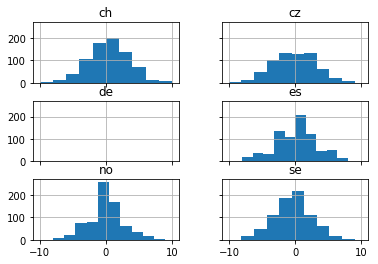

In [17]:
happiness = pd.DataFrame()
trust = pd.DataFrame()

happiness['ch'] = ch_happy
happiness['cz'] = cz_happy
happiness['de'] = de_happy
happiness['es'] = es_happy
happiness['no'] = no_happy
happiness['se'] = se_happy

trust['ch'] = ch_ppltrst
trust['cz'] = cz_ppltrst
trust['de'] = de_ppltrst
trust['es'] = es_ppltrst
trust['no'] = no_ppltrst
trust['se'] = se_ppltrst

# visualize the data
trust.hist(sharey=True,sharex=True)
plt.show()

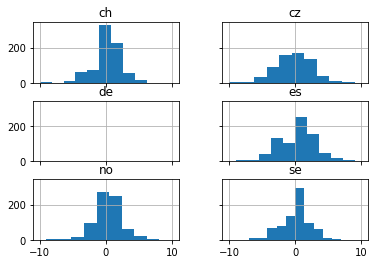

In [19]:
# visualize happiness
happiness.hist(sharey=True,sharex=True)
plt.show()

ch   -0.073739
cz   -0.067692
de   -0.142857
es    0.075130
no    0.048011
se   -0.295337
dtype: float64


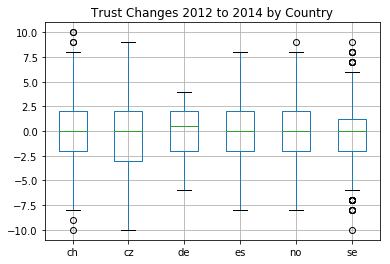

In [21]:
# Printing the means for each country for trust.
print(trust.mean())

trust.boxplot()
plt.title('Trust Changes 2012 to 2014 by Country')
plt.show()



In [22]:
stats.ttest_rel(ch[ch.year==6]['ppltrst'],ch[ch.year==7]['ppltrst'])

Ttest_relResult(statistic=-0.65868517567257368, pvalue=0.51029435113011345)

In [33]:
stats.ttest_rel(cz[cz.year==6]['ppltrst'],cz[cz.year==7]['ppltrst'],nan_policy='omit' )

Ttest_relResult(statistic=-0.50016383368872164, pvalue=0.61712926824047398)

In [32]:
stats.ttest_rel(de[de.year==6]['ppltrst'],de[de.year==7]['ppltrst'])

Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.85685637970958051)

In [34]:
stats.ttest_rel(es[es.year==6]['ppltrst'],es[es.year==7]['ppltrst'],nan_policy='omit' )

Ttest_relResult(statistic=2.4561906976601646, pvalue=0.014181580725320284)

In [35]:
stats.ttest_rel(no[no.year==6]['ppltrst'],no[no.year==7]['ppltrst'],nan_policy='omit' )

Ttest_relResult(statistic=0.50730770811244041, pvalue=0.61209257015176999)

In [36]:
stats.ttest_rel(se[se.year==6]['ppltrst'],se[se.year==7]['ppltrst'],nan_policy='omit' )

Ttest_relResult(statistic=-2.0671082026033982, pvalue=0.039007816709585447)

#  Results for Question 1

* We can say that people became less trusting for SE

* We can say that for ES they became more trusting.

* Other countries do not have a significant change in trust.

ch   -0.023377
cz   -0.162500
de   -0.428571
es    0.136187
no    0.339752
se    0.000000
dtype: float64


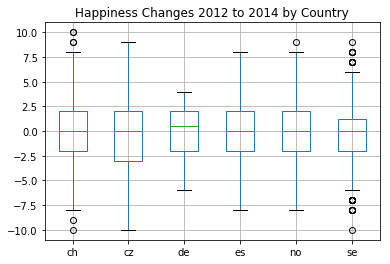

In [37]:
# Printing the means for each country for happiness.
print(happiness.mean())

trust.boxplot()
plt.title('Happiness Changes 2012 to 2014 by Country')
plt.show()

In [39]:
stats.ttest_rel(ch[ch.year==6]['happy'],ch[ch.year==7]['happy'],nan_policy='omit')

Ttest_relResult(statistic=-0.31941295786223201, pvalue=0.74950013554290629)

In [40]:
stats.ttest_rel(cz[cz.year==6]['happy'],cz[cz.year==7]['happy'],nan_policy='omit')

Ttest_relResult(statistic=-1.4561384833039597, pvalue=0.14584548433894509)

In [41]:
stats.ttest_rel(de[de.year==6]['happy'],de[de.year==7]['happy'],nan_policy='omit')

Ttest_relResult(statistic=-0.80622577482985491, pvalue=0.43461387077349911)

In [42]:
stats.ttest_rel(es[es.year==6]['happy'],es[es.year==7]['happy'],nan_policy='omit')

Ttest_relResult(statistic=1.613832417735418, pvalue=0.10682451556479494)

In [43]:
stats.ttest_rel(no[no.year==6]['happy'],no[no.year==7]['happy'],nan_policy='omit')

Ttest_relResult(statistic=4.2856826576235925, pvalue=2.067453013405473e-05)

In [44]:
stats.ttest_rel(se[se.year==6]['happy'],se[se.year==7]['happy'],nan_policy='omit')

Ttest_relResult(statistic=-0.55816370860300124, pvalue=0.57687095912337139)

#  Results for Question 2

* People became significantly happier only in NO.

* Other countries are not very significantly different except possibly for ES (p-value = .106)

In [46]:
df_2012 = df[df.year==6]

In [47]:
df_2012male = df_2012[df_2012.gndr==1]
df_2012female = df_2012[df_2012.gndr==2]

In [49]:
tvmale = df_2012male['tvtot']
tvfemale = df_2012female['tvtot']

Average tv viewing by TVTOT: 2012 males  3.90190609019
Average tv viewing by TVTOT: 2012 Females  3.94439252336


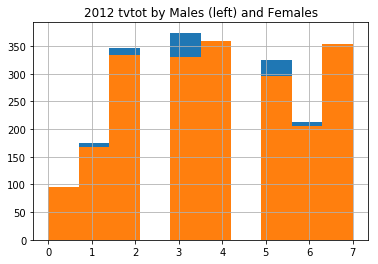

In [48]:
print("Average tv viewing by TVTOT: 2012 males ",df_2012male['tvtot'].mean())

print("Average tv viewing by TVTOT: 2012 Females ",df_2012female['tvtot'].mean())

# visualize the data
df_2012male['tvtot'].hist()
df_2012female['tvtot'].hist()
plt.title("2012 tvtot by Males (left) and Females")
plt.show()

In [51]:
stats.mannwhitneyu(tvmale, tvfemale, use_continuity=True, alternative='two-sided')

MannwhitneyuResult(statistic=2277506.5, pvalue=0.44838540462382914)

# Question 3 Results

* No significant difference between men and women for tv viewing in 2012

In [54]:
df2012partner = df_2012[df_2012.partner==1]
df2012alone = df_2012[df_2012.partner==2]

In [55]:
print("Average PPLFAIR: 2012 with Partner ",df2012partner['pplfair'].mean())

print("Average PPLFAIR: 2012 living alone ",df2012alone['pplfair'].mean())

Average PPLFAIR: 2012 with Partner  6.08073601202
Average PPLFAIR: 2012 living alone  5.85696517413


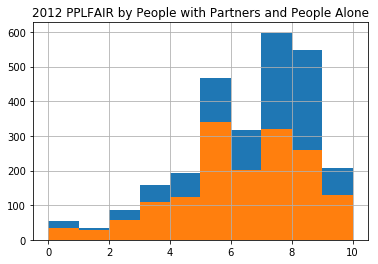

In [57]:
# visualize the data
df2012partner['pplfair'].hist()
df2012alone['pplfair'].hist()
plt.title("2012 PPLFAIR by People with Partners and People Alone")
plt.show()

In [58]:
stats.mannwhitneyu(df2012partner['pplfair'], df2012alone['pplfair'], use_continuity=True)

MannwhitneyuResult(statistic=2019588.5, pvalue=0.00013938009002030226)

## Question 4 Results ##

* People with a partner in 2012 have significantly greater belief than those living alone that people are fair

In [65]:
df2014 = df[df.year==7]
q5cz = df2014[df2014.cntry=='CZ']
q5no = df2014[df2014.cntry=='NO']
q5es = df2014[df2014.cntry=='ES']

In [75]:
print("Mean of SCLMEET in CZ",q5cz['sclmeet'].mean())
print("Mean of SCLMEET in NO",q5no['sclmeet'].mean())
print("Mean of SCLMEET in ES",q5es['sclmeet'].mean())

Mean of SCLMEET in CZ 4.44580152672
Mean of SCLMEET in NO 5.3023255814
Mean of SCLMEET in ES 5.26011560694


In [78]:
F, p = stats.f_oneway(q5cz['sclmeet'].dropna(), q5no['sclmeet'].dropna(), q5es['sclmeet'].dropna())

# The F statistic.
print(F)

# The probability. A p < .05 would lead us to believe the group means were
# not all similar in the population.
print(p)

81.7468010346
3.73017660628e-35


In [80]:
# well something appears different!!
# Which one?

print(stats.ttest_ind(q5cz['sclmeet'].dropna(), q5no['sclmeet'].dropna()))
print(stats.ttest_ind(q5cz['sclmeet'].dropna(), q5es['sclmeet'].dropna()))
print(stats.ttest_ind(q5no['sclmeet'].dropna(), q5es['sclmeet'].dropna()))

Ttest_indResult(statistic=-11.269186128577815, pvalue=3.0334022155191707e-28)
Ttest_indResult(statistic=-11.400026538179093, pvalue=3.7676844407353374e-29)
Ttest_indResult(statistic=0.63291639587000703, pvalue=0.5268628350318294)


##  Question 5 Results ##

* The countries 'CZ' and 'NO' are significantly different in Social Meeting

* The countries 'CZ' and 'ES'  are significantly different in Social Meeting

* Countries 'CZ' and 'ES" are not significantly different in Social Meeting

In [81]:
print("Mean of SCLACT in CZ",q5cz['sclact'].mean())
print("Mean of SCLACT in NO",q5no['sclact'].mean())
print("Mean of SCLACT in ES",q5es['sclact'].mean())

Mean of SCLACT in CZ 2.70307692308
Mean of SCLACT in NO 2.85909712722
Mean of SCLACT in ES 2.61687763713


In [82]:
F, p = stats.f_oneway(q5cz['sclact'].dropna(), q5no['sclact'].dropna(), q5es['sclact'].dropna())

# The F statistic.
print(F)

# The probability. A p < .05 would lead us to believe the group means were
# not all similar in the population.
print(p)

16.6074183908
6.82063334452e-08


In [83]:
#  Group means of countries appear different than average over population for sclact
#  Let's look at individual t-tests

print(stats.ttest_ind(q5cz['sclact'].dropna(), q5no['sclact'].dropna()))
print(stats.ttest_ind(q5cz['sclact'].dropna(), q5es['sclact'].dropna()))
print(stats.ttest_ind(q5no['sclact'].dropna(), q5es['sclact'].dropna()))

Ttest_indResult(statistic=-3.4467356116942098, pvalue=0.00058446345406456233)
Ttest_indResult(statistic=1.9231457887987455, pvalue=0.054616497855173432)
Ttest_indResult(statistic=5.6711491296635321, pvalue=1.6345881270312057e-08)


## Question 6 Results ##

* 'CZ' and 'NO' appear to be significantly different in (sclact) social activities among people your own age 

* 'CZ' and 'NO' appear significantly different at the 10% level.

* 'NO' and 'ES' appear extremely significant if differenced in SCLACT